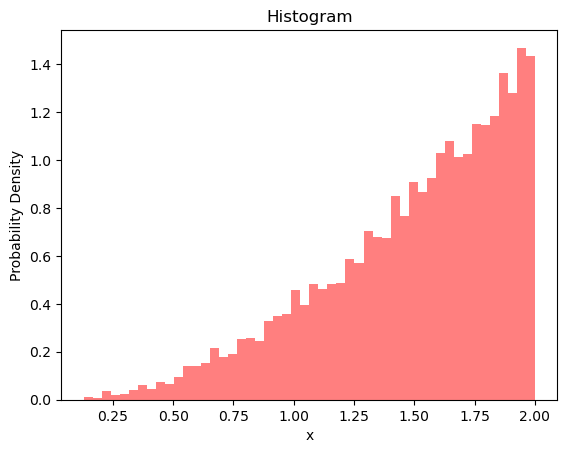

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Probability integral transform
u = np.random.rand(10000)   # uniform
x = 2 * u**(1/3)

# Plot
plt.hist(x, bins=50, density=True, color="red", alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Histogram")
plt.show()

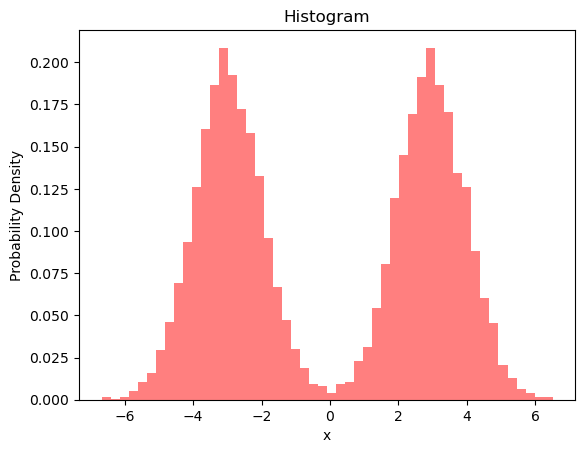

In [2]:
# Composition sampling
def mix_normal(w, dist, n):
    """
    Try help(mix_normal) at runtime to display docstring
    """
    m = len(w)
    index = np.random.choice(m, size=n, p=w)   # categorical random variable
    sample = np.zeros(n)   # sample each component
    for i in range(m):
        k = np.where(index == i)   # k is array
        sample[k] = dist[i].rvs(size=len(k[0]))
    return sample

# Sample mixture normal
w = [0.5, 0.5]
dist = [stats.norm(loc=-3, scale=1), stats.norm(loc=3, scale=1)]
sample = mix_normal(w, dist, 10000)

# Plot
plt.hist(sample, bins=50, density=True, color="red", alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Histogram")
plt.show()

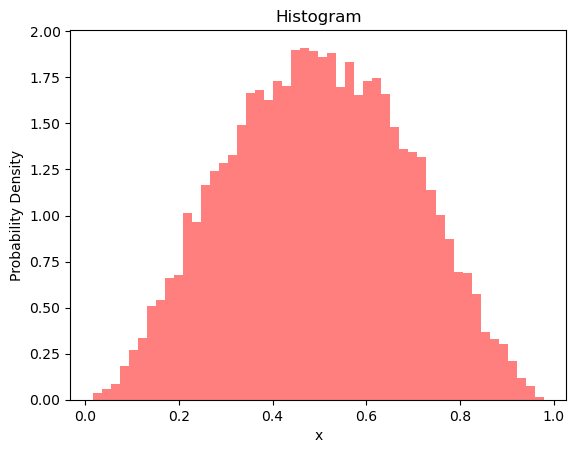

In [3]:
# Accept-reject sampling
def target(x):
    return stats.beta.pdf(x, a=3, b=3)

def proposal(x):
    return stats.uniform.pdf(x)

def accept_reject(target, proposal, c, n):
    sample = []
    while len(sample) < n:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= target(x) / (proposal(x)*c):
            sample.append(x)
    return np.array(sample)

# Sample beta
c = target(0.5) / proposal(0.5)
sample = accept_reject(target, proposal, c, 10000)

# Plot
plt.hist(sample, bins=50, density=True, color="red", alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Histogram")
plt.show()

In [4]:
# Importance sampling
def imp_sampler(target, proposal, sampler, n):
    sample = sampler(n)
    w = target(sample) / proposal(sample)
    return sample, w

# Monte Carlo integration
target = lambda x: stats.expon.pdf(x, scale=1)
proposal = lambda x: stats.beta.pdf(x, a=2, b=3)
sampler = lambda n: stats.beta.rvs(a=2, b=3, size=n)
n = 10000
sample, w = imp_sampler(target, proposal, sampler, n)
estimate = sum(1 / (1+sample**2) * w) / n
print(estimate)

0.52085304715368
